# Karol Kula Projekt 2

## Zadanie 1

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import re
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, Perceptron
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
titanic_data = pd.read_csv("titanic.csv")

In [3]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Kolejnym krokiem będzie przeanalizowanie opisowych statystyk tego zbioru danych, w tym wyszukanie brakujących wartości oraz przegląd typów danych dla każdej z kolumn.

Generowanie statystyk opisowych:

In [4]:
descriptive_stats = titanic_data.describe(include='all')

Sprawdzenie braków danych:

In [5]:
missing_values = titanic_data.isnull().sum()

Sprawdzenie typów danych

In [6]:
data_types = titanic_data.dtypes

Przygotowanie podsumowania:

In [7]:
summary_df = pd.DataFrame({
    'Typ Danych': data_types,
    'Liczba Brakujących Wartośc': missing_values,
    'Procent Brakujących': (missing_values / len(titanic_data)) * 100
})

Wyświetlenie statystyk i podsumowania

In [8]:
summary_df, descriptive_stats

(          Typ Danych  Liczba Brakujących Wartośc  Procent Brakujących
 pclass         int64                           0             0.000000
 survived       int64                           0             0.000000
 name          object                           0             0.000000
 sex           object                           0             0.000000
 age          float64                         263            20.091673
 sibsp          int64                           0             0.000000
 parch          int64                           0             0.000000
 ticket        object                           0             0.000000
 fare         float64                           1             0.076394
 cabin         object                        1014            77.463713
 embarked      object                           2             0.152788
 boat          object                         823            62.872422
 body         float64                        1188            90.756303
 home_

### Analiza zbioru danych wykazała następujące informacje:
Brakujące dane: Najwięcej brakujących wartości występuje w kolumnach cabin, boat, i body, home_dest. Kolumna age ma sporo brakujących wartości (20.09%) i warto wziąć to pod uwage ponieważ wiek może być ważnym czynnikiem przy przewidywaniu szans na przeżycie.

Typy danych: Większość kolumn to albo numeryczne albo kategorialne. Dla przetwarzania danych, wartości kategorialne mogą wymagać przekształcenia na format numeryczny.

Możliwe jest zaobserwowanie rozkładów wartości w kolumnach - np. średnia wieku to około 29.88 lat, ceny biletu sięgają od 0 do ponad 512 jednostek, większość pasażerów nie miała rodziny na pokładzie (kolumny sibsp i parch).

Najpierw zajmę się usuwaniem kolumn które mają zbyt duży procent brakujących wartości:

In [9]:
titanic_data = titanic_data.drop(columns=['cabin', 'boat', 'body','home_dest'])

In [10]:
titanic_data.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
embarked      2
dtype: int64

 Pozostało uzupełnić brakujące wartości (ZADANIE 4), z użyciem prostych metod imputacji zawartych w pakiecie  sickit learn

Celowo pomija teraz kolumne age, uzupełnie ją w zadaniu 2

In [11]:
fare_imputer = SimpleImputer(strategy='median')
titanic_data['fare'] = fare_imputer.fit_transform(titanic_data[['fare']])

embarked_imputer = SimpleImputer(strategy='most_frequent')
titanic_data['embarked'] = embarked_imputer.fit_transform(titanic_data[['embarked']]).ravel()

In [12]:
titanic_data.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          0
embarked      0
dtype: int64

Wszystkie braki danych Uzupełnione

## Zadanie 2

Wydobycie tytułów:

In [13]:
def extract_title(name):
    title_search = re.search(r' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

titanic_data['title'] = titanic_data['name'].apply(extract_title)

Stworzenie słownika z tytułami i srednią wieku dla nich

In [14]:
average_age_by_title = titanic_data.groupby('title')['age'].mean().to_dict()

average_age_by_title

{'Capt': 70.0,
 'Col': 54.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dona': 39.0,
 'Dr': 43.57142857142857,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 5.482703773584906,
 'Miss': 21.774206666666668,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.25215146299484,
 'Mrs': 36.99411764705882,
 'Ms': 28.0,
 'Rev': 41.25,
 'Sir': 49.0}

In [15]:
titanic_data.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          0
embarked      0
title         0
dtype: int64

Uzupełnienie kolumny age

In [16]:
def fill_missing_age(row):
    if pd.isnull(row['age']):
        return average_age_by_title[row['title']]
    else:
        return row['age']

titanic_data['age'] = titanic_data.apply(fill_missing_age, axis=1)

In [17]:
titanic_data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
title       0
dtype: int64

Usunięcie tymczasowej kolumny

In [18]:
titanic_data = titanic_data.drop(columns=['title'])

Utworzenie 3 dodatkowych zmiennych:

family_size

In [19]:
titanic_data['family_size'] = titanic_data['sibsp'] + titanic_data['parch'] + 1

age_range

In [20]:
def categorize_age(age):
    if age <= 6:
        return 'Bobas'
    elif age <= 12:
        return 'Dzieciak'
    elif age <= 18:
        return 'Nastolatek'
    else:
        return 'Dorosly'

titanic_data['age_range'] = titanic_data['age'].apply(categorize_age)

mpc

In [21]:
titanic_data['mpc'] = titanic_data['age'] * titanic_data['pclass']

In [22]:
titanic_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family_size,age_range,mpc
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,1,Dorosly,29.00000
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,4,Bobas,0.91670
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,4,Bobas,2.00000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,4,Dorosly,30.00000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,4,Dorosly,25.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,2,Nastolatek,43.50000
1305,3,0,"Zabour, Miss. Thamine",female,21.774207,1,0,2665,14.4542,C,2,Dorosly,65.32262
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,1,Dorosly,79.50000
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,1,Dorosly,81.00000


## Zadanie 3
Kolumna survived powinna być traktowana jako dane kategoryczne, ponieważ reprezentuje dwie kategorie: 0 (nie przeżył) i 1 (przeżył).
Kolumna pclass również powinna być traktowana jako dane kategoryczne, mimo że zawiera numery klas, one reprezentują różne poziomy usług i są skategoryzowane jako 1. klasa, 2. klasa i 3. klasa.
Kolumna embarked zawiera kody portów, które są zdecydowanie danymi kategorycznymi.
Kolumna sex oczywiście reprezentuje dane kategoryczne, rozróżniając płeć.

Jeśli chodzi o kolumnę fare, powinna ona pozostać jako wartość numeryczna (zwykle typu float), ponieważ reprezentuje ciągłą wartość ceny biletu i może być używana jako taka w modelu predykcyjnym.

In [23]:
titanic_data['survived'] = titanic_data['survived'].astype('category')
titanic_data['pclass'] = titanic_data['pclass'].astype('category')
titanic_data['embarked'] = titanic_data['embarked'].astype('category')
titanic_data['sex'] = titanic_data['sex'].astype('category')
titanic_data['age_range'] = titanic_data['age_range'].astype('category')
titanic_data['fare'] = titanic_data['fare'].astype('float')
titanic_data.dtypes

pclass         category
survived       category
name             object
sex            category
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
embarked       category
family_size       int64
age_range      category
mpc             float64
dtype: object

## Zadanie 4 - zrobione we wcześniejszych krokach

## Zadanie 5

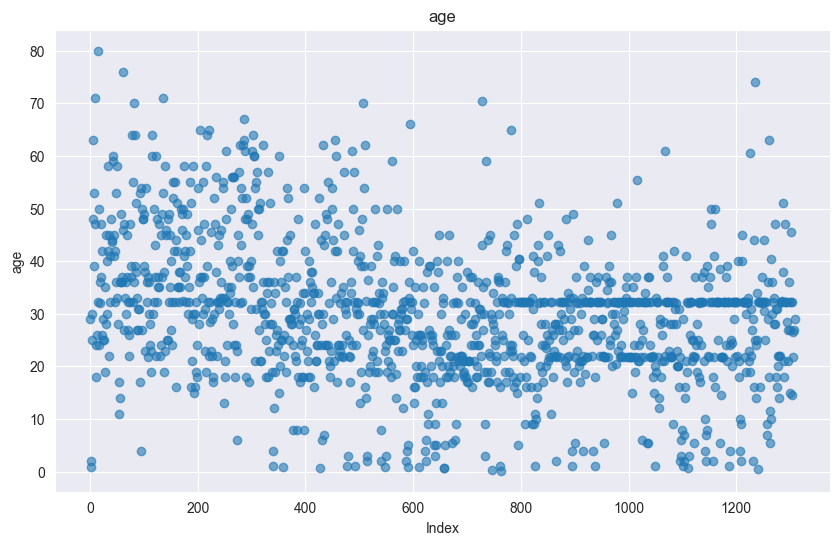

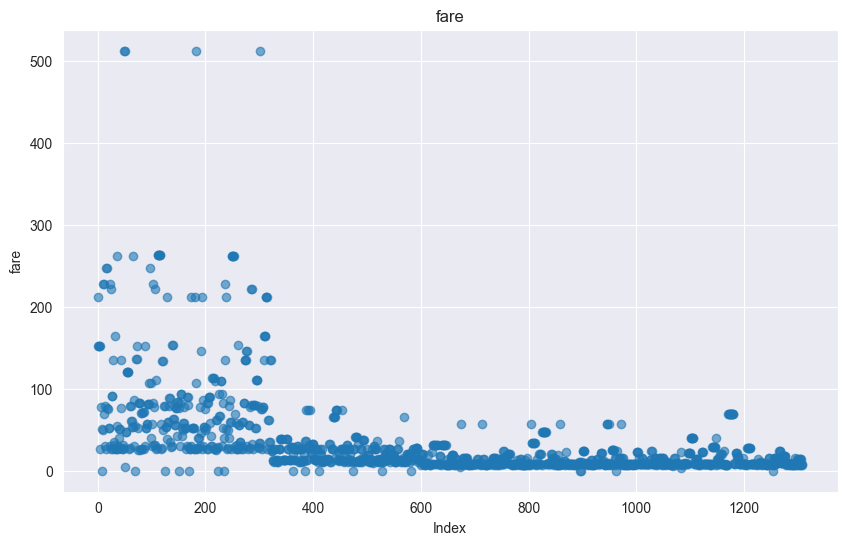

In [24]:
def plot_attribute(attribute):

    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(titanic_data)), titanic_data[attribute], alpha=0.6)
    plt.title(attribute)
    plt.xlabel('Index')
    plt.ylabel(attribute)
    plt.show()

plot_attribute('age')
plot_attribute('fare')

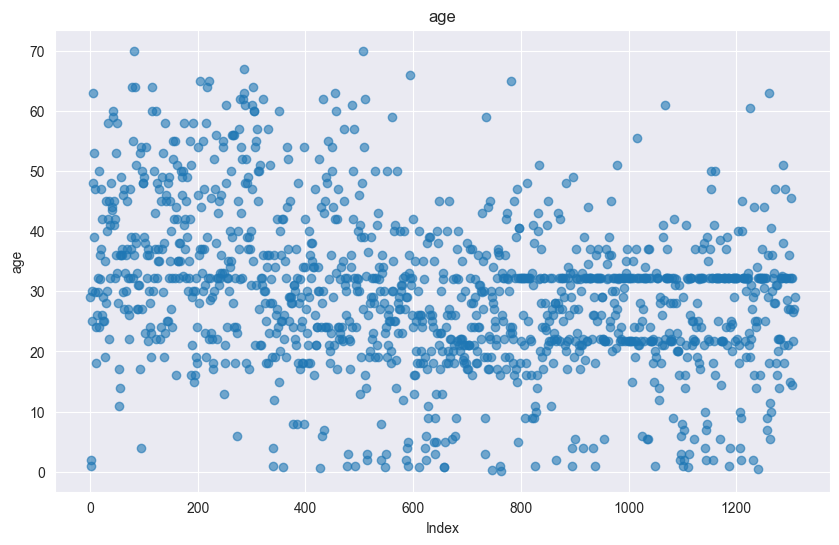

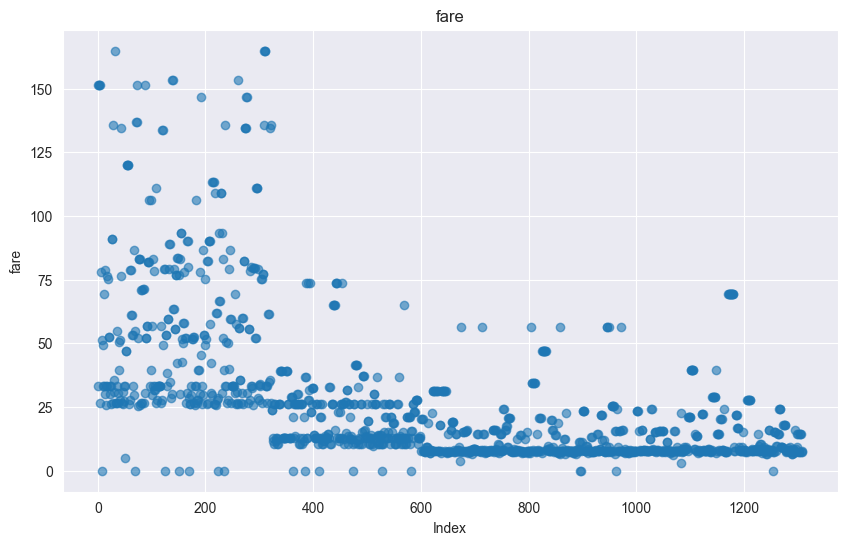

In [25]:
def replace_outliers_with_mean(df, attribute, threshold):
    mean_value = df[attribute].mean()
    df.loc[df[attribute] > threshold, attribute] = mean_value
    return df

titanic_data = replace_outliers_with_mean(titanic_data, 'age', 70)

fare_outlier_threshold = titanic_data['fare'].mean() + 3 * titanic_data['fare'].std()
titanic_data = replace_outliers_with_mean(titanic_data, 'fare', fare_outlier_threshold)

plot_attribute('age')
plot_attribute('fare')

In [26]:

numerical_columns = titanic_data.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
titanic_data[numerical_columns] = scaler.fit_transform(titanic_data[numerical_columns])
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,family_size,age_range,mpc
0,1,1,"Allen, Miss. Elisabeth Walton",female,0.412888,0.000,0.000000,24160,0.201867,S,0.0,Dorosly,0.128668
1,1,1,"Allison, Master. Hudson Trevor",male,0.010740,0.125,0.222222,113781,0.919227,S,0.3,Bobas,0.001881
2,1,0,"Allison, Miss. Helen Loraine",female,0.026253,0.125,0.222222,113781,0.919227,S,0.3,Bobas,0.006772
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,0.427207,0.125,0.222222,113781,0.919227,S,0.3,Dorosly,0.133182
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,0.355608,0.125,0.222222,113781,0.919227,S,0.3,Dorosly,0.110609


# Zadanie 7

Sprawdźmy korelacje kolumny survived z innymi kolumnami w celu wybrania ich jako do uczenia modelu

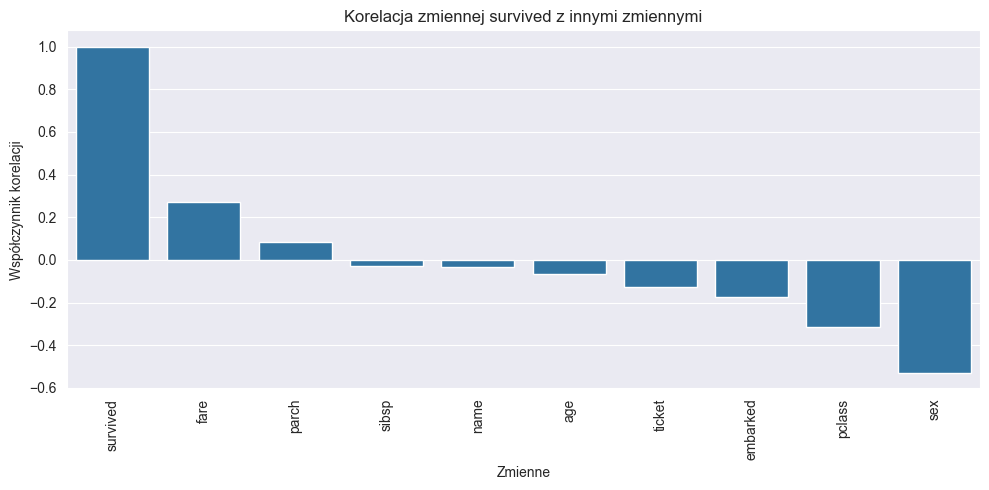

survived    1.000000
fare        0.270255
parch       0.082660
sibsp      -0.027825
name       -0.032298
age        -0.068012
ticket     -0.125869
embarked   -0.175313
pclass     -0.312469
sex        -0.528693
Name: survived, dtype: float64

In [27]:
df_numerical = titanic_data.copy()

df_numerical = df_numerical.drop(columns=['mpc', 'family_size', 'age_range',])

for column in df_numerical.select_dtypes(include=['object', 'category']).columns:
    df_numerical[column] = df_numerical[column].astype('category').cat.codes


df_numerical.fillna(-1, inplace=True)

correlations = df_numerical.corr()['survived'].sort_values(ascending=False)


plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Korelacja zmiennej survived z innymi zmiennymi')
plt.ylabel('Współczynnik korelacji')
plt.xlabel('Zmienne')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

correlations



2. Największą ujemną korelację z przeżywalnością ma zmienna sex, co sugeruje, że płeć miała znaczący wpływ na szanse przeżycia. Wartość korelacji około -0.529 wskazuje na to, że kobiety miały wyższe szanse na przeżycie. Ta zależność może wynikać z polityki "kobiety i dzieci pierwsze" stosowanej podczas ewakuacji statku.
2. Drugą zmienną po sex z istotną ujemną korelacją z survived jest pclass, co oznacza, że pasażerowie podróżujący w lepszych klasach mieli wyższe szanse na przeżycie (-0.312).
3. Zmienna embarked, po przekształceniu na wartości numeryczne, ma również ujemną korelację, ale jest ona mniej znacząca niż dla sex i pclass. Może to sugerować, że miejsce wejścia na pokład mogło mieć pewien wpływ na przeżywalność, np. ze względu na rozmieszczenie miejsc wejścia w stosunku do łodzi ratunkowych.
4. Wśród zmiennych pozytywnie skorelowanych z survived jest fare, co może sugerować, że osoby, które zapłaciły więcej za bilet, miały wyższe szanse na przeżycie (0.27). To może odzwierciedlać fakt, że osoby płacące wyższe ceny za bilety były częściej umieszczane w lepszych klasach, co zwiększało ich szanse na przeżycie.
5. Zmienna parch (rodzice/dzieci na pokładzie) ma również pozytywną, choć słabą korelację z przeżyciem. To może wskazywać, że osoby podróżujące z rodziną, szczególnie z dziećmi, były priorytetowo traktowane podczas ratunku.

Przygotowania:

In [28]:
predictor_cols = ['sex', 'age', 'age_range', 'pclass', 'fare', 'mpc', 'family_size', 'embarked']
titanic_data_encoded = pd.get_dummies(titanic_data[predictor_cols])
target = titanic_data['survived']

Podział danych:

In [29]:
X_train, X_val, y_train, y_val = train_test_split(titanic_data_encoded, target, test_size=0.2)

Przygotowanie modeli:

In [30]:
models = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression()]

## Ze względu na lekką losowość wyników, pod sam koniec wyświetlam posortowaną liste modeli po najlepszym wyniku, generalnie to niektóre bardziej obiecujące modele starałem się jeszcze poprawić wybierając najlepsze hiperparametry  

Trenowanie i ewaluacja

In [31]:
results = {}

def train_model(models, X_train, X_val, y_train, y_val):
    scores = {}
    
    for model in models:
        model_name = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        scores[model_name] = accuracy
    
    return scores


results.update(train_model(models, X_train, X_val, y_train, y_val))
results

{'DecisionTreeClassifier': 0.7633587786259542,
 'RandomForestClassifier': 0.8091603053435115,
 'LogisticRegression': 0.7786259541984732}

LogisticRegression wypada  najlepiej, spróbujmy dostroić hiperparametry modelu używająć GridSearchCV

In [32]:
param_grid = {
    'penalty': ['l2'], #tylko l2, przy reszcie miałem wyjątek
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
    'max_iter': [100, 200, 300, 400, 500, 1000]
}

grid_search = GridSearchCV(estimator=models[2], param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

results['LogisticRegression_HP'] = best_score
best_params, best_score


Fitting 3 folds for each of 120 candidates, totalling 360 fits


({'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'},
 0.8003820439350525)

wynik nie zawsze się poprawia, jednak spróbujmy dostroić hiperparametry dla 2 najlepszego modelu czyli RandomForestClassifier

In [33]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

grid_search = GridSearchCV(estimator=models[1], param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
results['RandomForestClassifier_HP'] = best_score
best_params, best_score

Fitting 3 folds for each of 320 candidates, totalling 960 fits


({'max_depth': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 50},
 0.8099331423113658)

Całkiem nieźle, w zależności od próby dopasowanie czasem jest nawet większe niż 82%

In [34]:
models = [
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    BaggingClassifier(),
    RidgeClassifier(),
    SGDClassifier(),
    Perceptron(),
    BernoulliNB(),
    SVC(),
]
modelResults = train_model(models,X_train, X_val, y_train, y_val)
results.update(modelResults)
modelResults

{'GradientBoostingClassifier': 0.816793893129771,
 'KNeighborsClassifier': 0.7977099236641222,
 'GaussianNB': 0.7557251908396947,
 'BaggingClassifier': 0.8053435114503816,
 'RidgeClassifier': 0.7786259541984732,
 'SGDClassifier': 0.6755725190839694,
 'Perceptron': 0.6984732824427481,
 'BernoulliNB': 0.7862595419847328,
 'SVC': 0.8282442748091603}

GradientBoostingClassifier wygląda obiecująco 

In [35]:
gbc = GradientBoostingClassifier()

param_grid_gbc = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 10, 15, 20], 
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'learning_rate': [0.001, 0.01, 0.1, 1]  # Learning rate jest specyficzny dla GBC
}

grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, cv=3, n_jobs=-1, verbose=2)

grid_search_gbc.fit(X_train, y_train)

best_params_gbc = grid_search_gbc.best_params_
best_score_gbc = grid_search_gbc.best_score_
results['GradientBoostingClassifier_HP'] = best_score_gbc
best_params_gbc, best_score_gbc

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


({'learning_rate': 0.01,
  'max_depth': 3,
  'min_samples_leaf': 4,
  'min_samples_split': 20,
  'n_estimators': 200},
 0.8089780324737345)

# Wynik
Czasem nawet uzyskuje 84 procent w gbc


In [36]:
sorted(results.items() , key=lambda x: x[1], reverse=True)

[('SVC', 0.8282442748091603),
 ('GradientBoostingClassifier', 0.816793893129771),
 ('RandomForestClassifier_HP', 0.8099331423113658),
 ('RandomForestClassifier', 0.8091603053435115),
 ('GradientBoostingClassifier_HP', 0.8089780324737345),
 ('BaggingClassifier', 0.8053435114503816),
 ('LogisticRegression_HP', 0.8003820439350525),
 ('KNeighborsClassifier', 0.7977099236641222),
 ('BernoulliNB', 0.7862595419847328),
 ('LogisticRegression', 0.7786259541984732),
 ('RidgeClassifier', 0.7786259541984732),
 ('DecisionTreeClassifier', 0.7633587786259542),
 ('GaussianNB', 0.7557251908396947),
 ('Perceptron', 0.6984732824427481),
 ('SGDClassifier', 0.6755725190839694)]